<a href="https://colab.research.google.com/github/apradols/curso-regressao-linear-2/blob/main/curso_regressao_linear_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### aula 1: analises preliminares

In [1]:
import pandas as pd

In [4]:
dados = pd.read_csv('/content/dataset.csv', sep=';')

In [5]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [7]:
dados.shape

(5000, 4)

In [8]:
dados.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


In [9]:
dados.corr()

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000000,0.710974,-0.366542,-0.024366
Area,0.710974,1.000000,-0.283371,-0.030990
Dist_Praia,-0.366542,-0.283371,1.000000,0.025645
Dist_Farmacia,-0.024366,-0.030990,0.025645,1.000000


### aula 2: análises gráficas

In [10]:
import seaborn as sns

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

<Axes: title={'center': 'Preço dos imóveis'}, xlabel='Reais'>

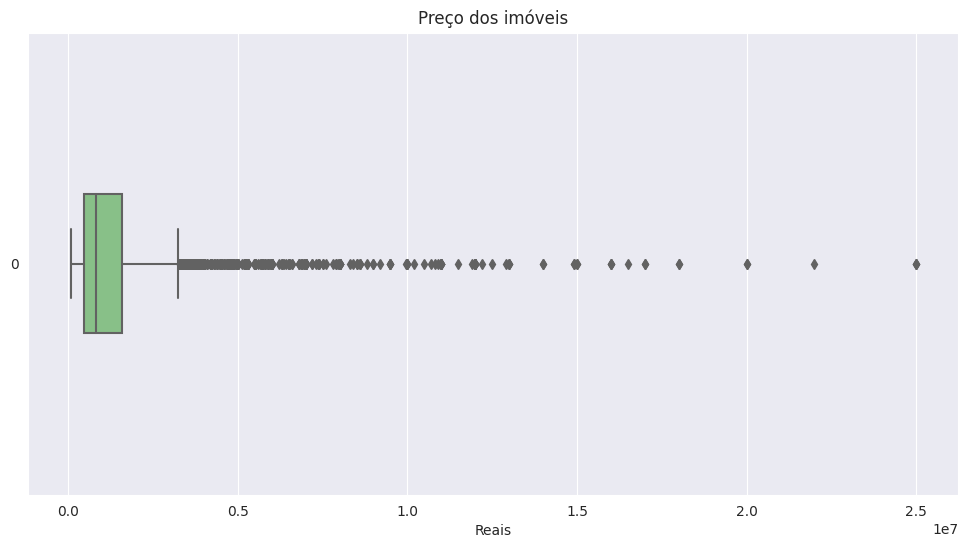

In [16]:
ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos imóveis')
ax.set_xlabel('Reais')
ax

<ipython-input-17-0aa8eb542e25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Valor'])


<Axes: title={'center': 'Preço dos imóveis'}, xlabel='Reais', ylabel='Density'>

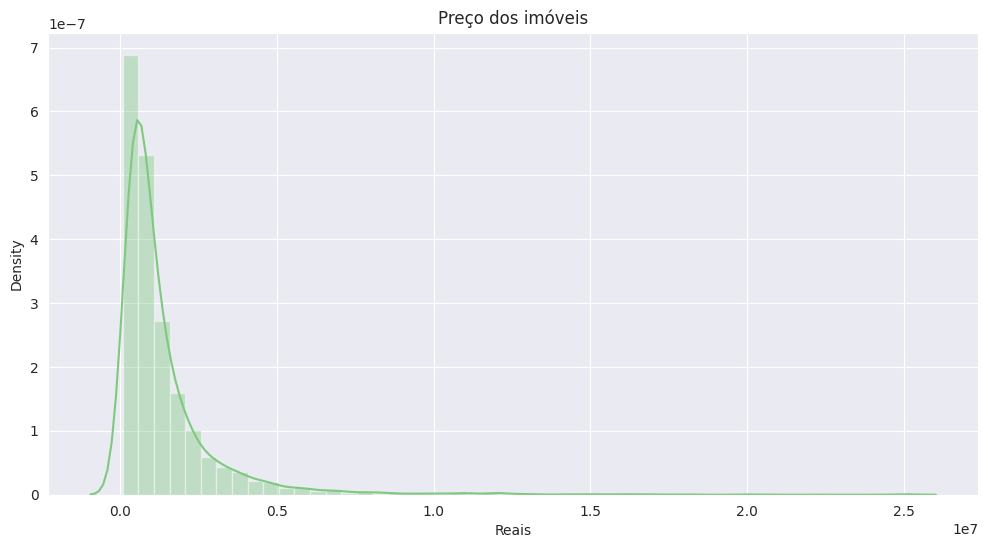

In [17]:
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos imóveis')
ax.set_xlabel('Reais')
ax

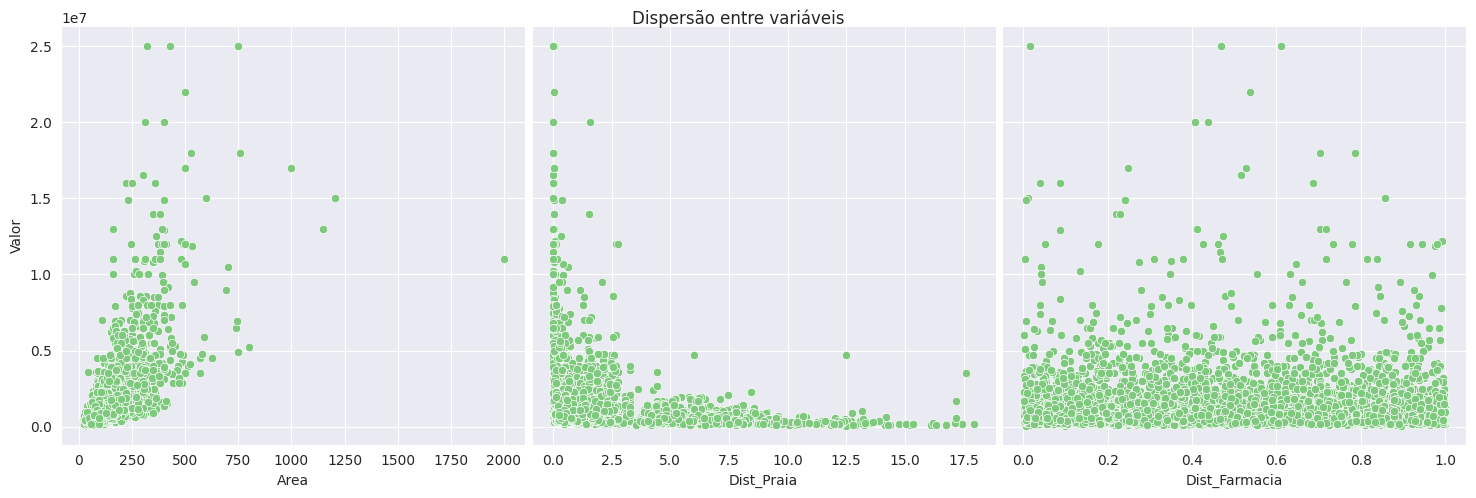

In [19]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre variáveis')
ax

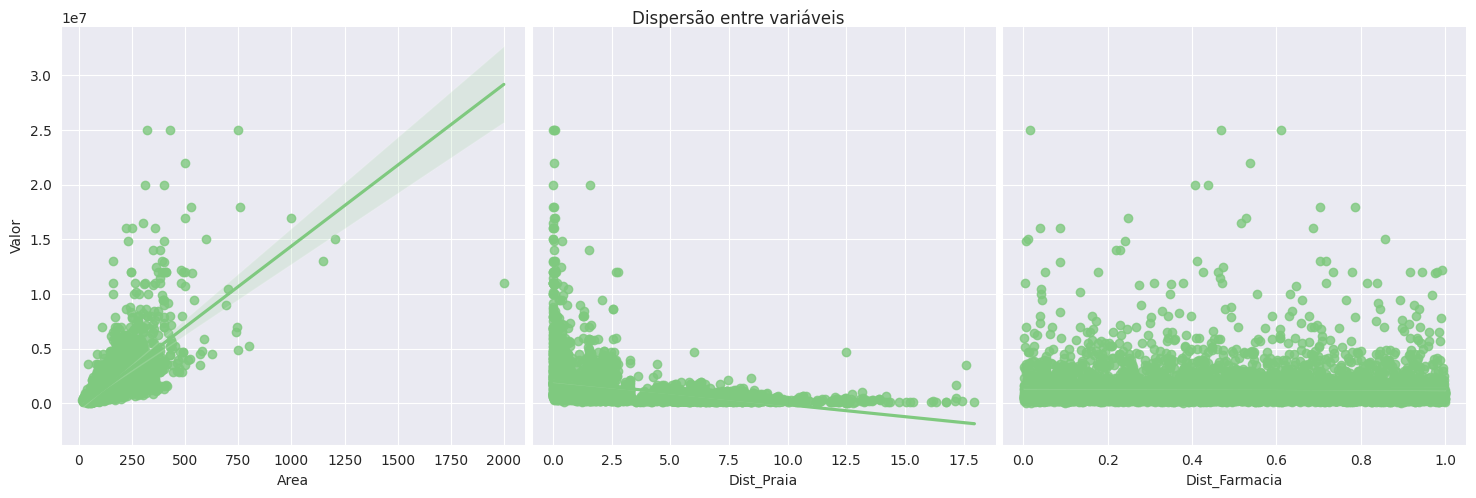

In [21]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre variáveis')
ax

### aula 3: transformando variáveis

In [22]:
import numpy as np

In [23]:
np.log(1)

0.0

In [24]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [25]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


<ipython-input-27-857cb0cb49a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['log_Valor'])


<Axes: title={'center': 'Preço dos imóveis'}, xlabel='Reais', ylabel='Density'>

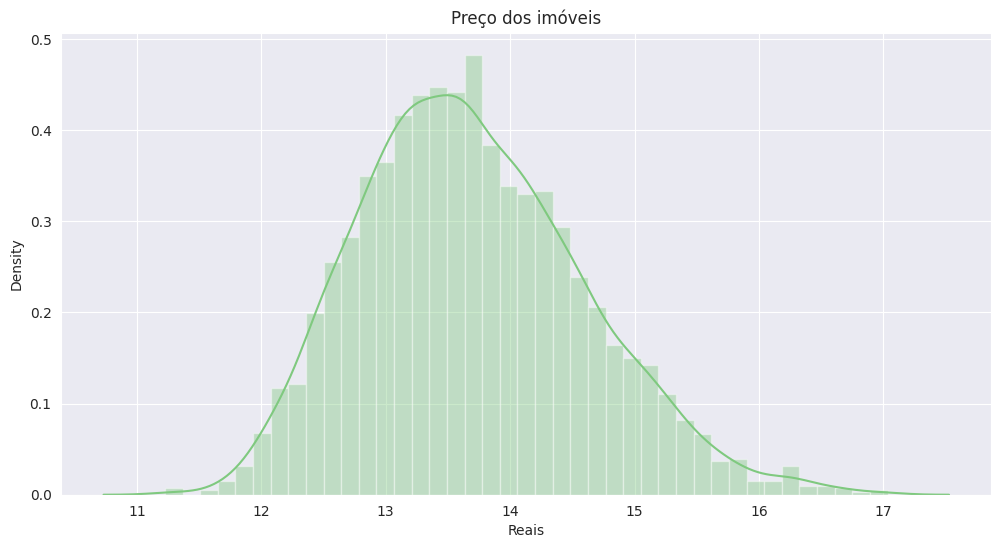

In [27]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos imóveis')
ax.set_xlabel('Reais')
ax

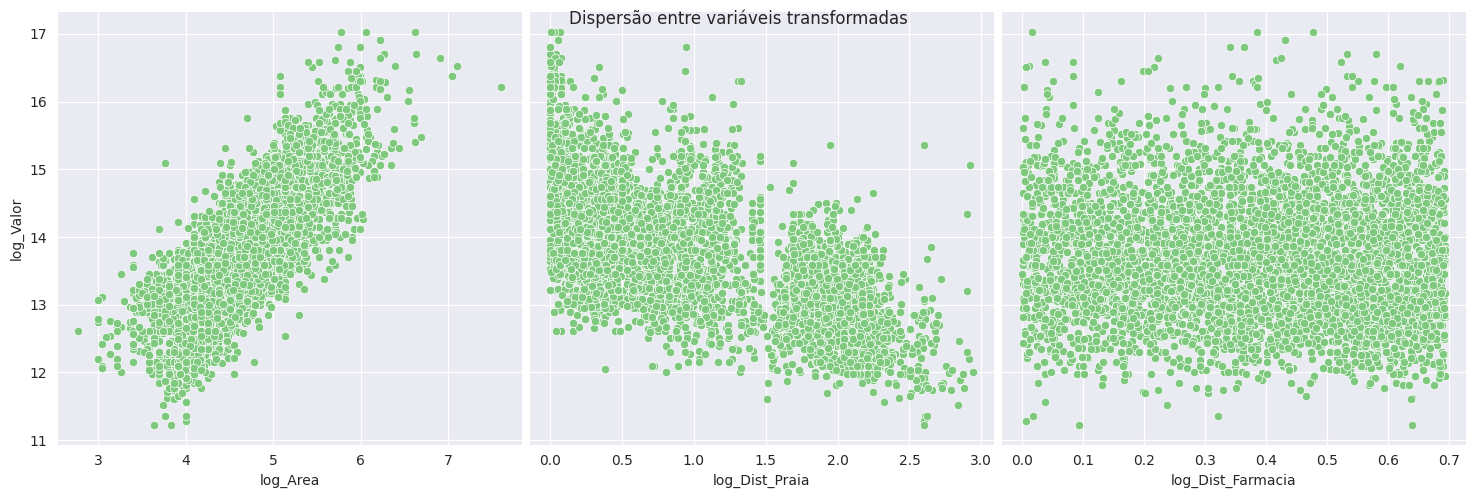

In [29]:
ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre variáveis transformadas')
ax

aula 4: regressão linear com StatsModels

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y = dados['log_Valor']

In [32]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [38]:
import statsmodels.api as sm

In [39]:
X_train_constante =  sm.add_constant(X_train)

In [36]:
X_train

,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903
...,...,...,...
3657,5.075174,2.023480,0.333605
979,4.174387,2.296141,0.156465
2389,4.394449,1.367741,0.409727
447,3.951244,2.166841,0.217381


In [37]:
X_train_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [41]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst=True).fit()

In [44]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:26:22   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
log_Area              1.0580      0.012     89.320      0.000       1.035       1.081
log_Dist_Praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_Dist_Farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
X = dados[['log_Area', 'log_Dist_Praia']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [48]:
X_train_constante =  sm.add_constant(X_train)

In [49]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst=True).fit()

In [50]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:38:16   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.353      0.000       9.219       9.450
log_Area           1.0581      0.012     89.345      0.000       1.035       1.081
log_Dist_Praia    -0.4906      0.009    -56.709      0.000      -0.508      -0.474
==============================================================================
Omnibus:                       65.115   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.712
Skew:                           0.136   Prob(JB):                     4.08e-24
Kurtosis:                       3.757   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### aula 5: regressão linear com Scikit Learn

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [52]:
modelo = LinearRegression()

In [53]:
modelo.fit(X_train, y_train)

LinearRegression()

In [55]:
print('R² = {}' .format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


In [57]:
y_previsto = modelo.predict(X_test)

In [60]:
print('R² = {}' .format(metrics.r2_score(y_test, y_previsto).round(3)))

R² = 0.79


In [62]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


In [64]:
modelo.predict(entrada)[0]

14.284820061847878

In [65]:
np.exp(modelo.predict(entrada)[0])

1598889.7847794362

In [68]:
Area = 250
Dist_Praia = 1
entrada =[[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 2777292.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
modelo.intercept_

9.33491640980033

In [71]:
np.exp(modelo.intercept_)

11326.681428069862

In [72]:
modelo.coef_

array([ 1.05807818, -0.49061226])

In [73]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

In [74]:
index=['intercept', 'Área', 'Distancia até a praia']

In [79]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Métricas'])

,Métricas
intercept,9.334916
Área,1.058078
Distancia até a praia,-0.490612


In [80]:
y_previsto_train =  modelo.predict(X_train)

<Axes: title={'center': 'Previsao X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

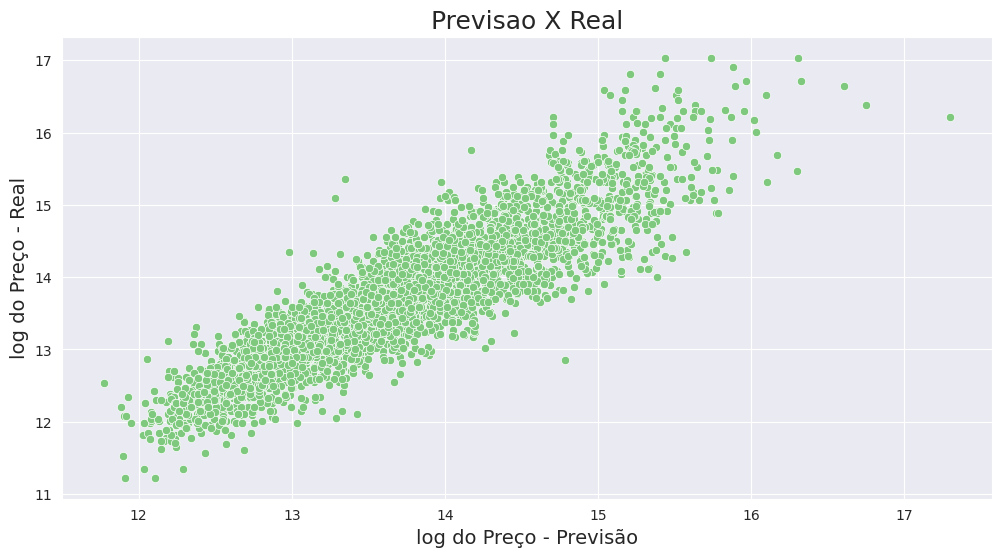

In [81]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

In [82]:
residuo = y_train - y_previsto_train

<ipython-input-87-c80314355d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='log do preço', ylabel='Density'>

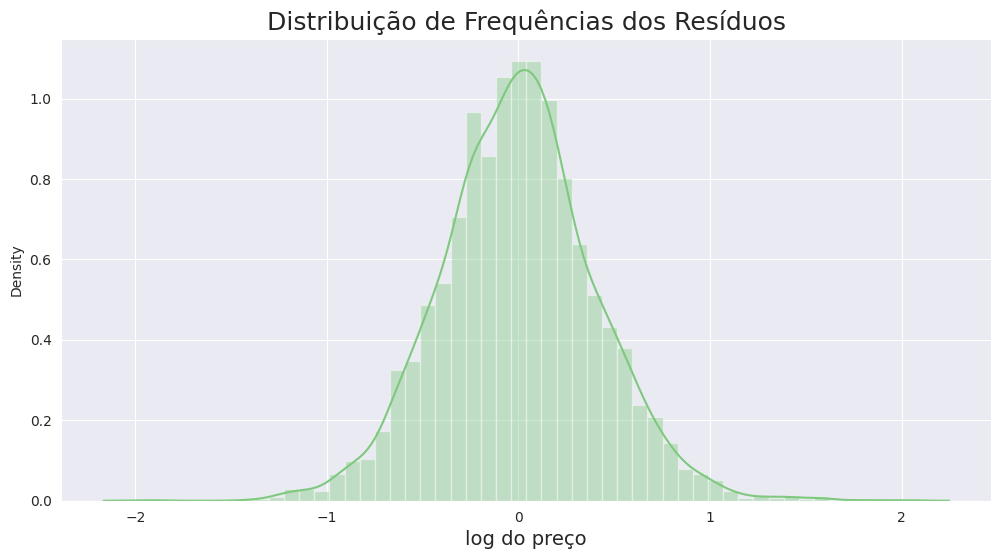

In [87]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do preço', fontsize=14)
ax